In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
B = pd.read_csv('bank.csv')
B.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [3]:
B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [4]:
B['subscribed'].value_counts()

no     4000
yes     521
Name: subscribed, dtype: int64

In [5]:
from sklearn.utils import resample

In [6]:
bsn = B[B['subscribed']=='no']
bsy = B[B['subscribed'] =='yes']

In [7]:
BMU = resample(bsy, replace=True, n_samples=2000, random_state=42)   # bank minority unsampled

In [8]:
NB = pd.concat([bsn, BMU])         # new bank
NB['subscribed'].value_counts()


no     4000
yes    2000
Name: subscribed, dtype: int64

In [9]:
# NB = shuffle(NB)

In [10]:
Xf = list(NB.columns)
Xf.remove('subscribed')
Xf

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [11]:
EB = pd.get_dummies(NB[Xf], drop_first=True)
X = EB
X

,age,balance,current-campaign,previous-campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing-loan_yes,personal-loan_yes
0,30,1787,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,33,4789,1,4,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,1
2,35,1350,1,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,30,1476,4,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,1
4,59,0,1,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,35,7050,3,4,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1177,28,4579,2,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3498,58,462,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4366,59,0,1,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [12]:
Y = NB['subscribed'].map(lambda x: int(x=='yes'))

In [39]:
pca = PCA(n_components = 6, whiten=True )       # if n_components=5,22,98,41,etc., it will bw the no of columns to which it is reduced. if n_components is between 0 & 1 , it will be the % of variance retained and we eill have no control over the no of columns to which it is reduced.

In [23]:
Fpca= pca.fit_transform(X)     # features PCA

In [21]:
print('Original no of features:', X.shape[1])
print('Reduced no of features:', Fpca.shape[1])

Original no of features: 23
Reduced no of features: 6


In [22]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Fpca,Y,test_size=0.3, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(Xtrain, Ytrain)

LogisticRegression(max_iter=100000)

In [25]:
predY = model.predict(Xtest)
predY

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
model.predict_proba(Xtest)

array([[0.54947519, 0.45052481],
       [0.66030207, 0.33969793],
       [0.76320182, 0.23679818],
       ...,
       [0.73831243, 0.26168757],
       [0.60005846, 0.39994154],
       [0.63100489, 0.36899511]])

### Performance Matrix

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
from sklearn import metrics

In [29]:
print(confusion_matrix(Ytest,predY))

[[1158   67]
 [ 475  100]]


In [30]:
print(classification_report(Ytest,predY))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81      1225
           1       0.60      0.17      0.27       575

    accuracy                           0.70      1800
   macro avg       0.65      0.56      0.54      1800
weighted avg       0.67      0.70      0.64      1800



In [34]:
metrics.accuracy_score(Ytest, predY)

0.6988888888888889

In [35]:
auc1 = metrics.roc_auc_score(Ytest,model.predict_proba(Xtest)[:,1])
auc1

0.6716393966282166

### Drawing RoC Curve

In [36]:
fpr , tpr , thresholds = metrics.roc_curve(Ytest,model.decision_function(Xtest))

In [37]:
roc_auc = metrics.auc(fpr,tpr)

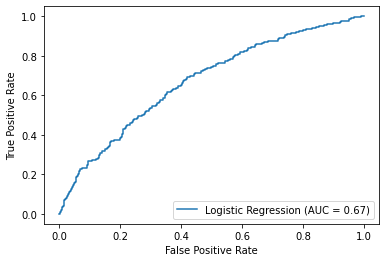

In [38]:
display = metrics.RocCurveDisplay(fpr = fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()